#**Anime Rating Analysis & Recommender System**

In [51]:
import pandas as pd
import matplotlib.pyplot as plt
# import plotly as pd
import numpy as np
import seaborn as sns
from pprint import pprint
from tabulate import tabulate

#**Business Understanding**
##**Tujuan Bisnis**
Tujuan proyek ini adalah untuk menganalisis data rating anime dan mengembangkan sistem rekomendasi untuk memberikan rekomendasi yang baik untuk pengguna berdasarkan kesukaan mereka. Dengan demikian, diharapkan dapat meningkatkan pengalaman pengguna dalam menemukan anime yang sesuai dengan selera mereka.


##**Assess Situation**
Situasi bisnis yang mendasari proyek ini adalah:

1. Kebutuhan akan sistem yang dapat membantu memberikan rekomendasi yang sesuai dengan selera mereka
2. Meningkatkan interaksi pengguna dengan platform anime.
3. Kurangnya pemahaman selera unik setiap pengguna, maka terdapat keaadan yang dimana rekomendasinya kurang tepat


##**Data Mining Goals**
Tujuan dari analisis data pada dataset ini adalah :


1. Mengembangkan sistem rekomendasi yang dapat memberikan rekomendasi anime yang sesuai dengan selera pengguna.
2.   Memprediksi rating anime berdasarkan faktor-faktor tertentu
3. mengidentifikasi tren dan pola dalam data rating


##**Projek Plan**
Pertama-tama dimulai dengan pengumpulan data rating anime dari sumber yang tersedia. Selanjutnya, data akan dijelaskan karakteristiknya dan pola-pola yang menarik untuk di itentifikasi. kemudian mendeskripsikan data yang akan di identifikasi seperti contoh "ID anime, nama, genre, jenis, episode, rating", lalu menilai kualitas data dan masalah data yang akan diidentifikasi.

#**Data Understanding**

##**Collect Initial Data**

In [85]:
Data_URL = 'https://raw.githubusercontent.com/selaputriismalia/Data_Mining/main/anime.csv'

In [87]:
data = pd.read_csv(Data_URL, on_bad_lines='skip')

In [65]:
data = pd.read_csv("anime.csv")

In [17]:
data.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


##**Describe Data**

###Informasi Dasar

In [18]:
print("Baris :",data.shape[0])
print("Kolom :",data.shape[1])

Baris : 12294
Kolom : 7


Pada Dataset yang tersedia total Baris adalah 12294 dengan total kolom 7

###informasi Lanjut

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12294 entries, 0 to 12293
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  12294 non-null  int64  
 1   name      12294 non-null  object 
 2   genre     12232 non-null  object 
 3   type      12269 non-null  object 
 4   episodes  12294 non-null  object 
 5   rating    12064 non-null  float64
 6   members   12294 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 672.5+ KB


pada index 0 terdapat kolom "anime_id" Kolom ini berisi ID unik untuk setiap anime dalam dataset. Jumlahnya 12294 dan memiliki tipe data int64.

pada index 1 terdapat kolom "nama" Kolom ini berisi nama anime. Setiap entri adalah string (objek) dan tidak ada nilai yang hilang (non-null) di kolom ini.

pada index 2 terdapat kolom "genre" Kolom ini berisi genre-genre dari setiap anime. Ada 12232 entri non-null dalam kolom ini. Tipe data kolom ini adalah objek (string).

pada index 3 terdapat kolom "type" Kolom ini mewakili jenis dari anime, seperti TV, OVA, Movie, dll. Ada 12269 entri non-null dalam kolom ini. Tipe datanya adalah objek (string).

pada index 4 terdapat kolom "episodes" Kolom ini berisi informasi tentang jumlah episode dari setiap anime. Semua entri adalah string. Jumlah total entri sesuai dengan jumlah baris dalam dataset (12294).

pada index 5 terdapat kolom "rating" Kolom ini berisi rating dari setiap anime. Ada 12064 entri non-null dalam kolom ini. Tipe data kolom ini adalah float64.

pada index 6 terdapat kolom "members" Kolom ini berisi jumlah anggota yang telah memberikan peringkat terhadap anime tersebut. Semua entri adalah bilangan bulat (int64)

Jadi, dataset ini berisi informasi tentang anime, termasuk ID, nama, genre, jenis, jumlah episode, rating, dan jumlah anggota yang memberikan peringkat. Beberapa kolom memiliki (missing values), seperti genre, type, dan rating

###Informasi Statistik Deskriptif

In [20]:
data.describe()

,anime_id,rating,members
count,12294.000000,12064.000000,1.229400e+04
mean,14058.221653,6.473902,1.807134e+04
std,11455.294701,1.026746,5.482068e+04
min,1.000000,1.670000,5.000000e+00
25%,3484.250000,5.880000,2.250000e+02
50%,10260.500000,6.570000,1.550000e+03
75%,24794.500000,7.180000,9.437000e+03
max,34527.000000,10.000000,1.013917e+06


pada kolom output "index" diatas merupakan perhitungan yang meliputi, count,mean,sdt,min,25%,50%,75%, dan Max

pada kolom output "anime_id" Kolom ini berisi ID unik untuk setiap anime dalam dataset. Jumlah entri dalam kolom ini adalah 12294.0, Rata-rata entri dalam kolom ini adalah 14058.221652838783,Nilai minimumnya adalah 1.0 dan nilai maksimumnya adalah 34527.0  Standar deviasi dari kolom ini adalah 11455.29, menunjukkan sebaran yang cukup besar dari nilai-nilai anime_id. Nilai-nilai ini juga menunjukkan bahwa data anime_id tidak diurutkan secara berurutan.

rating: Kolom ini berisi rating untuk setiap anime. Jumlah entri yang tidak null dalam kolom ini adalah 12064. Nilai rata-ratanya adalah 6.47 dengan standar deviasi sekitar 1.03, menunjukkan variasi yang cukup rendah di antara nilai-nilai rating. Rating terendah adalah 1.67 dan rating tertinggi adalah 10.0.

members: Kolom ini berisi jumlah anggota yang memberikan peringkat terhadap anime tersebut. Jumlah entri dalam kolom ini adalah 12294. Jumlah anggota terendah yang memberikan peringkat adalah 5 dan jumlah anggota tertinggi yang memberikan peringkat adalah 1013917. Standar deviasi dari kolom ini adalah 54820.68, menunjukkan sebaran yang cukup besar dari jumlah anggota yang memberikan peringkat.

##**Exploratoory Data Analysis**

###Distribusi Variabel Tunggal

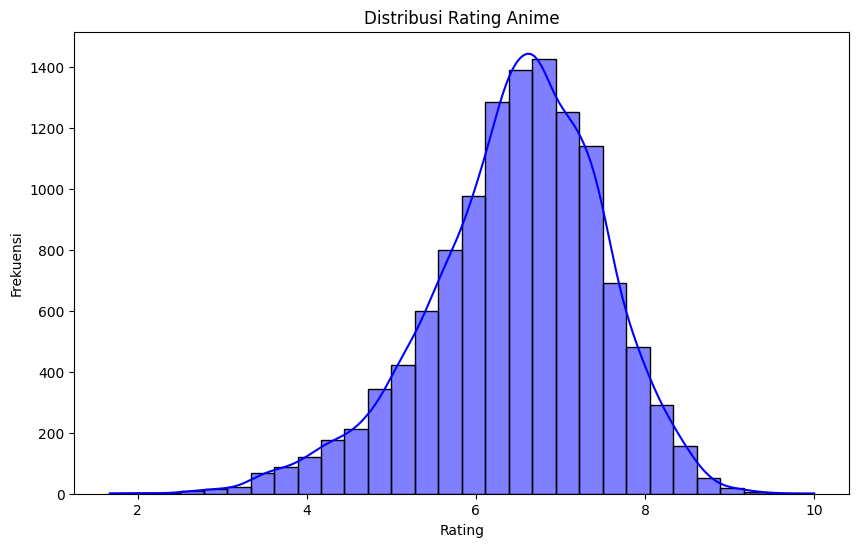

In [21]:
plt.figure(figsize=(10, 6))
sns.histplot(data['rating'], bins=30, kde=True, color='blue')
plt.title('Distribusi Rating Anime')
plt.xlabel('Rating')
plt.ylabel('Frekuensi')
plt.show()

####Histogram Distribusi Rating Anime:


Penjelasan: Histogram menunjukkan distribusi rating anime dalam dataset. yang dimana frekuensi dimulai dari 0-1400 dan rating dimulai dari 0-10


####**Interpretasi:**

*   Distribusi rating anime pada dataset ini tidak normal, dengan kemiringan ke kiri yang menunjukkan bahwa mayoritas anime memiliki rating yang lebih rendah.
*   Puncak distribusi berada di sekitar rating 6-7, menunjukkan bahwa banyak anime yang memiliki kualitas rata-rata.
* Ada beberapa anime yang memiliki rating sangat tinggi (9-10) dan juga sangat rendah (1-2).

*   Distribusi rating anime pada dataset ini menunjukkan bahwa Penonton anime memiliki selera yang beragam, dengan preferensi yang berbeda terhadap genre, gaya animasi, dan cerita.
* ada banyak anime yang memiliki kualitas yang kurang baik bagi beberapa preferensi tertentu
*   Ada banyak juga anime yang memiliki kualitas yang baik dan menarik bagi berbagai kalangan
* Rating anime tidak selalu mencerminkan kualitasnya, sehingga penting untuk melihat faktor lain seperti genre, cerita, dan karakter








###Hubungan Antar Dua Variabel

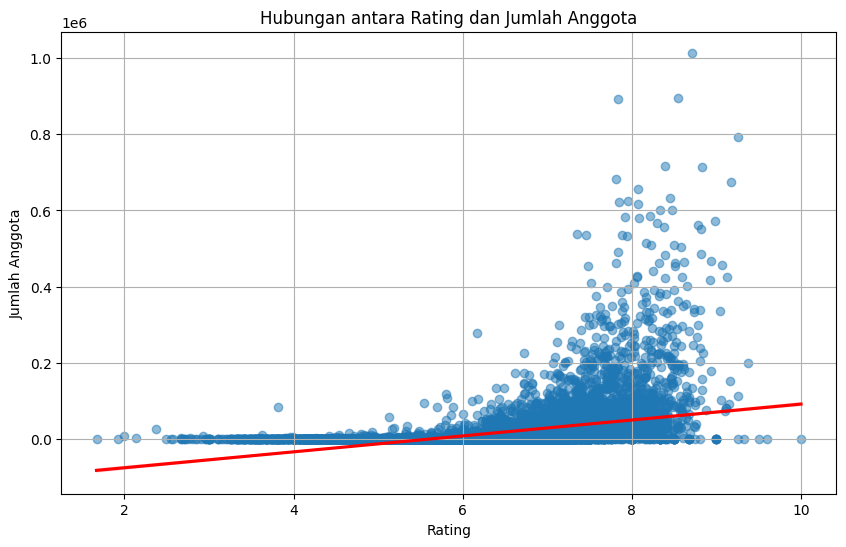

In [23]:
plt.figure(figsize=(10, 6))
sns.regplot(x='rating', y='members', data=data, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.title('Hubungan antara Rating dan Jumlah Anggota')
plt.xlabel('Rating')
plt.ylabel('Jumlah Anggota')
plt.grid(True)
plt.show()


###Scatter plot untuk melihat hubungan antara rating dan jumlah anggota

####**Interpretasi**


* Rating dan jumlah anggota saling terkait. Anime dengan rating tinggi cenderung memiliki lebih banyak anggota, dan komunitas anime dengan banyak anggota cenderung memiliki rating tinggi.
* Rating dapat menjadi indikator popularitas dan kualitas anime, dan komunitas anime yang aktif dan memiliki banyak konten menarik dapat menarik lebih banyak anggota.
* Anime dengan rating tinggi lebih populer dan menarik minat lebih banyak orang untuk bergabung dengan komunitasnya.
* Rating tinggi dapat menjadi indikator kualitas anime, sehingga orang lebih tertarik untuk menonton dan bergabung dengan komunitasnya.
* Komunitas anime dengan rating tinggi biasanya lebih aktif dan memiliki lebih banyak konten menarik, sehingga menarik lebih banyak anggota.





###Komposisi Variabel

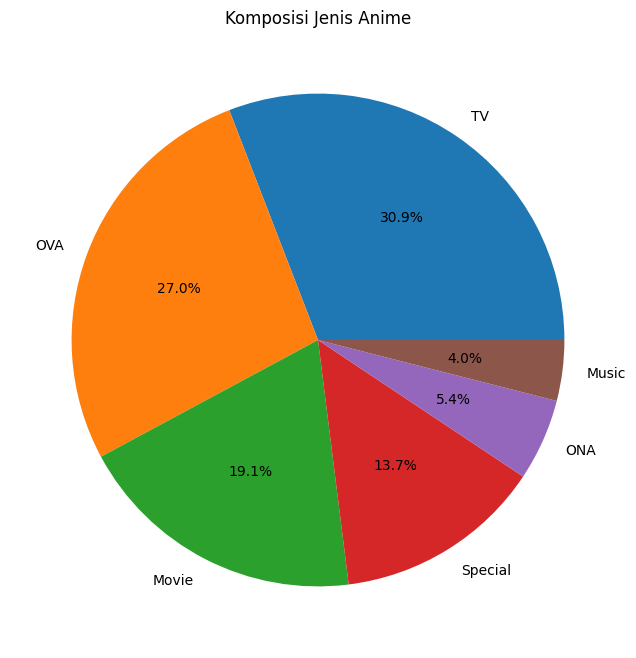

In [24]:
plt.figure(figsize=(8, 8))
data['type'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Komposisi Jenis Anime')
plt.ylabel('')
plt.show()

###Pie chart untuk melihat komposisi jenis anime

####**Interpretasi**



*   TV: 30.9%
*   OVA: 27.0%
* Movie:
* ONA: 13.7%
* Music: 4.0%
* Special: 5.4%
* Terdapat berbagai jenis anime yang tersedia, dengan anime TV sebagai format yang paling populer.
* Setiap jenis anime memiliki karakteristik dan target penontonnya sendiri.
* Penonton anime dapat memilih jenis anime yang sesuai dengan selera mereka.





###Perbandingan Antar Kategori yang Berbeda

<ipython-input-32-b1f4f837306f>:2: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




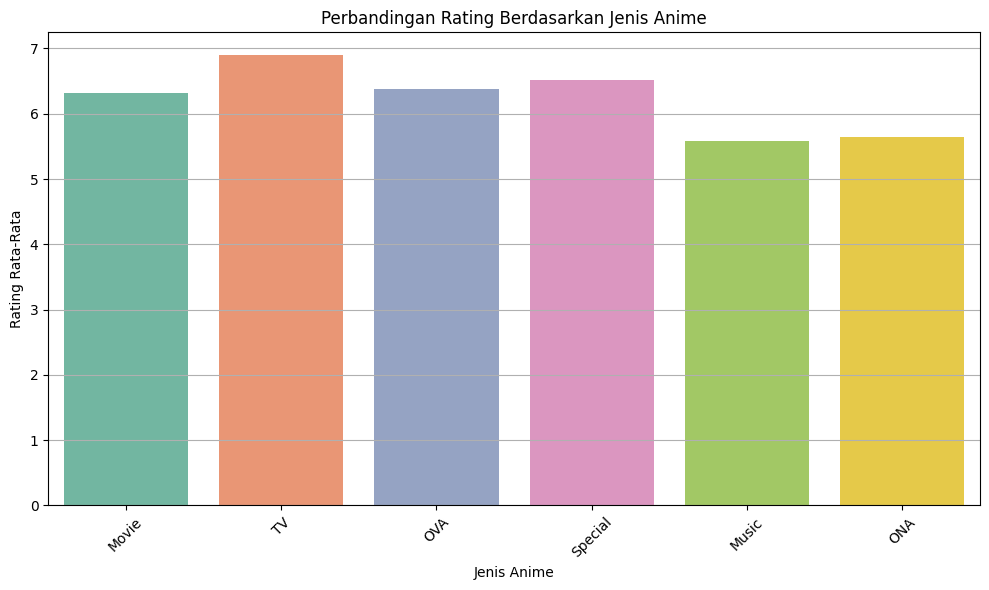

In [32]:
plt.figure(figsize=(10, 6))
sns.barplot(x='type', y='rating', data=data, hue='type', palette='Set2', ci=None, dodge=False)
plt.title('Perbandingan Rating Berdasarkan Jenis Anime')
plt.xlabel('Jenis Anime')
plt.ylabel('Rating Rata-Rata')
plt.xticks(rotation=45)
plt.legend([], frameon=False)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

###Barchart untuk melihat perbandingan rating berdasarkan jenis anime

####**Interpretasi**


*   TV memiliki rating rata-rata tertinggi yaitu (6.8)
*   Movie dan OVA meiliki rata-rata yang sama yaitu (6.4)
* Music dan ONA memiliki rata-rata yang sama yaitu (5.6)





##**Verify Data Quality**

###Missing Values

In [33]:
for col in data.columns:
  print(f"Kolom {col}: {data[col].isnull().sum()} nilai kosong")

Kolom anime_id: 0 nilai kosong
Kolom name: 0 nilai kosong
Kolom genre: 62 nilai kosong
Kolom type: 25 nilai kosong
Kolom episodes: 0 nilai kosong
Kolom rating: 230 nilai kosong
Kolom members: 0 nilai kosong


* pada output dataset diatas memiliki beberapa kolom yang nilai nya kosong, diantaranya genre sebanyak 65, type sebanyak 25, dan rating sebanyak 230
*Rating merupakan kolom terbanyak yang nilainya kosong

###Outliers Values

In [59]:
data['episodes'] = pd.to_numeric(data['episodes'], errors='coerce')

cols = ['anime_id', 'rating', 'members']

outliers_percentage = []

for col in cols:
    if pd.api.types.is_numeric_dtype(data[col]):
        q1, q3 = data[col].quantile(0.25), data[col].quantile(0.75)
        iqr = q3 - q1
        outlier_percentage = ((data[col] < (q1 - 1.5 * iqr)) | (data[col] > (q3 + 1.5 * iqr))).mean() * 100
        outliers_percentage.append(outlier_percentage)
    else:
        outliers_percentage.append('N/A')
results_df = pd.DataFrame({
    'Columns': cols,
    'Outliers Percentage': outliers_percentage
}).set_index('Columns')

print(results_df)


          Outliers Percentage
Columns                      
anime_id             0.000000
rating               1.862697
members             15.454693


outliers pada kolom anime_id, rating dan members



*   anime_id: Tidak ada outlier dalam kolom ini, yang berarti tidak ada nilai di luar rentang yang dianggap abnormal atau tidak wajar.
*   rating: Terdapat 1.86% outlier dalam kolom rating. Ini mengindikasikan bahwa sebagian kecil nilai dalam kolom rating berada di luar jangkauan nilai yang umum.
* members: Sekitar 15.45% data dalam kolom members dianggap outlier. Ini menunjukkan bahwa sejumlah besar entri memiliki jumlah anggota yang signifikan,



###Duplicated Values

In [63]:
for col in data.columns:
    duplicated_values = data[col][data[col].duplicated()]
    if duplicated_values.empty:
        print(f'Tidak ada nilai duplikat dalam kolom {col}')
    else:
        print(f'Nilai duplikat dalam kolom {col}:')
        print(duplicated_values)

Tidak ada nilai duplikat dalam kolom anime_id
Nilai duplikat dalam kolom name:
10141           Saru Kani Gassen
10194    Shi Wan Ge Leng Xiaohua
Name: name, dtype: object
Nilai duplikat dalam kolom genre:
4        Action, Comedy, Historical, Parody, Samurai, S...
8        Action, Comedy, Historical, Parody, Samurai, S...
9        Action, Comedy, Historical, Parody, Samurai, S...
12       Action, Comedy, Historical, Parody, Samurai, S...
14                  Comedy, Drama, School, Shounen, Sports
                               ...                        
12289                                               Hentai
12290                                               Hentai
12291                                               Hentai
12292                                               Hentai
12293                                               Hentai
Name: genre, Length: 9029, dtype: object
Nilai duplikat dalam kolom type:
2           TV
3           TV
4           TV
5           TV
6           

###**Duplikasi antar kolom**
pada output diatas mengecek perkolom apakah terdapat kolom yang memiliki duplikasi. kolom yang memiliki duplikasi diantara nya "name, genre, type, episode, rating, members" hanya ada satu kolom yang tidak memili duplikat yaitu kolom "anime_id"

In [56]:
total_duplicates = f"Jumlah total duplikasi: {data.duplicated().sum()}"
total_duplicates

'Jumlah total duplikasi: 0'

###**Duplikasi keseluruhan DataFrame**

pada ouput diatas mengecek keseluruh dataframe apakah memiliki nilai duplikasi dan hasilnya tidak ada nilai duplikasi.

###Inconsistent Values / Noise

In [47]:
print("Tipe data kolom:")
print(data.dtypes)

Tipe data kolom:
anime_id      int64
name         object
genre        object
type         object
episodes     object
rating      float64
members       int64
dtype: object


In [60]:
[print(f"Columns -> {col}\n{data[col].unique()}\n\n{'-' * 30}") for col in data.columns]

Columns -> anime_id
[32281  5114 28977 ...  5621  6133 26081]

------------------------------
Columns -> name
['Kimi no Na wa.' 'Fullmetal Alchemist: Brotherhood' 'Gintama°' ...
 'Violence Gekiga David no Hoshi'
 'Violence Gekiga Shin David no Hoshi: Inma Densetsu'
 'Yasuji no Pornorama: Yacchimae!!']

------------------------------
Columns -> genre
['Drama, Romance, School, Supernatural'
 'Action, Adventure, Drama, Fantasy, Magic, Military, Shounen'
 'Action, Comedy, Historical, Parody, Samurai, Sci-Fi, Shounen' ...
 'Hentai, Sports' 'Drama, Romance, School, Yuri' 'Hentai, Slice of Life']

------------------------------
Columns -> type
['Movie' 'TV' 'OVA' 'Special' 'Music' 'ONA' nan]

------------------------------
Columns -> episodes
['1' '64' '51' '24' '10' '148' '110' '13' '201' '25' '22' '75' '4' '26'
 '12' '27' '43' '74' '37' '2' '11' '99' 'Unknown' '39' '101' '47' '50'
 '62' '33' '112' '23' '3' '94' '6' '8' '14' '7' '40' '15' '203' '77' '291'
 '120' '102' '96' '38' '79' '175' '1

[None, None, None, None, None, None, None]

Nilai unik pada kolom



*    anime_id: Berisi ID unik untuk setiap anime dalam dataset.
*   name: Berisi nama-nama anime yang berbeda dalam dataset.
* genre: Berisi genre-genre anime yang ada. Beberapa anime dapat memiliki beberapa genre yang dipisahkan oleh koma.
* type: Menunjukkan jenis anime, seperti Movie, TV series, OVA, Special, Music, atau ONA. Terdapat juga nilai "nan"
* episodes: Menunjukkan jumlah episode untuk setiap anime. Terdapat juga nilai 'Unknown'.
* rating: Menunjukkan rating untuk setiap anime. Rating berkisar dari 1 hingga 10.
*  members: Menunjukkan jumlah anggota yang memasukkan anime ke dalam daftar mereka.



